In [52]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import math
import csv
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import tree
py.sign_in('pongngai', 'nkOGg4Ym3J1JFb6yu27O')
%matplotlib inline

In [20]:
#Read CSV file from the url to DataFrame
url = "https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv"
s = requests.get(url).text
wk = pd.read_csv(StringIO(s))

In [3]:
whiskey.head()

,Name,Rating,Country,Category,Price,ABV,Age,Brand
0,Canadian Hunter Canadian Whisky,40.0,Canada,Blended,9.0,40.0,NaN,Canadian Hunter
1,Canadian LTD Blended Canadian Whiskey,43.0,Canada,Blended,10.0,NaN,NaN,Canadian LTD
2,Kellan Irish Whiskey,47.0,Ireland,Blended,20.0,40.0,NaN,Kellan
3,Rich & Rare Canadian Whisky,47.0,Canada,Blended,10.0,NaN,NaN,Rich & Rare
4,Canadian Mist Blended Canadian Whisky,48.0,Canada,Blended,12.0,40.0,NaN,Canadian Mist


In [4]:
#Show number of record (rows,columns)
whiskey.shape

(283, 8)

In [5]:
#Show data type of each arttibute
whiskey.dtypes

Name         object
Rating      float64
Country      object
Category     object
Price       float64
ABV         float64
Age         float64
Brand        object
dtype: object

In [6]:
#Describe basic statistic for each numeric attribute
for x in ('Rating','Price','ABV','Age'):
    print(whiskey[x].describe())
    print('\n')

count    272.000000
mean      84.474265
std       11.877887
min       40.000000
25%       80.000000
50%       88.000000
75%       94.000000
max      100.000000
Name: Rating, dtype: float64


count    279.000000
mean      72.483871
std       83.992242
min        2.000000
25%       30.000000
50%       50.000000
75%       80.000000
max      850.000000
Name: Price, dtype: float64


count    270.000000
mean      44.610444
std        5.883056
min       35.500000
25%       40.000000
50%       43.000000
75%       46.000000
max       68.200000
Name: ABV, dtype: float64


count    174.000000
mean      14.339080
std        6.322267
min        0.000000
25%       10.000000
50%       14.500000
75%       18.000000
max       40.000000
Name: Age, dtype: float64




In [7]:
#Describe basic statistic for each norminal attribute
for x in ['Name','Country','Category','Brand']:
    print(whiskey[x].describe())
    print('\n')

count                                                   283
unique                                                  283
top       Springbank 15 Year Old Campbeltown Single Malt...
freq                                                      1
Name: Name, dtype: object


count          283
unique           9
top       Scotland
freq           108
Name: Country, dtype: object


count         283
unique         15
top       Blended
freq           73
Name: Category, dtype: object


count          283
unique         153
top       Balvenie
freq             7
Name: Brand, dtype: object




In [8]:
#Show missing values of each attribute
whiskey.isnull().sum()

Name          0
Rating       11
Country       0
Category      0
Price         4
ABV          13
Age         109
Brand         0
dtype: int64

In [9]:
#convert nominal data to numeric data
lb_encoder = LabelEncoder()
whiskey['Country'] = lb_encoder.fit_transform(whiskey['Country'])
whiskey['Category'] = lb_encoder.fit_transform(whiskey['Category'])
whiskey['Brand'] = lb_encoder.fit_transform(whiskey['Brand'])

In [10]:
#create numpy array from DataFrame
x = whiskey.values

In [11]:
#Remove attribute Name because it is identifier attribute
x = x[:,1:]

In [12]:
#Look around the rating attribute
x[:,0]

array([40.0, 43.0, 47.0, 47.0, 48.0, 50.0, 53.0, 54.0, 54.0, 54.0, 56.0,
       56.0, 57.0, 57.0, 58.0, 60.0, 60.0, 64.0, 64.0, 65.0, 65.0, 67.0,
       67.0, 67.0, 67.0, 67.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0,
       70.0, 70.0, 71.0, 71.0, 72.0, 73.0, 73.0, 74.0, 74.0, 74.0, 74.0,
       75.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 77.0, 77.0, 77.0, 77.0,
       77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 79.0, 79.0, 80.0, 80.0,
       80.0, 80.0, 80.0, 80.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0,
       81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0,
       82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 83.0, 83.0, 83.0,
       83.0, 83.0, 83.0, 83.0, 83.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0,
       85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.0, 86.0, 86.0,
       86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 87.0,
       87.0, 87.0, 87.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0,
       88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88

In [13]:
#Find median of each numeric attribute
med_rating = np.median([xx for xx in x[:,0] if not math.isnan(xx)])
med_price = np.median([xx for xx in x[:,3] if not math.isnan(xx)])
med_avb = np.median([xx for xx in x[:,4] if not math.isnan(xx)])
med_age = np.median([xx for xx in x[:,5] if not math.isnan(xx)])

In [14]:
#Create new numpy array that replace the missing values with median (only numeric attributes)
rating = np.array([med_rating if math.isnan(xx) else xx for xx in x[:,0]]).reshape(-1,1)
price = np.array([med_price if math.isnan(xx) else xx for xx in x[:,3]]).reshape(-1,1)
avb = np.array([med_avb if math.isnan(xx) else xx for xx in x[:,4]]).reshape(-1,1)
age = np.array([med_age if math.isnan(xx) else xx for xx in x[:,5]]).reshape(-1,1)
num_att = np.concatenate((rating, price, avb, age), axis=1)

In [15]:
#Define function that return lower and upper outlier of data.
def outlier(x):
    rating_q1 = np.percentile(x,25)
    rating_q3 = np.percentile(x,75)
    IQR = rating_q3 - rating_q1
    lower_outlier = rating_q1 - (1.5*IQR)
    higher_outlier = rating_q3 + (1.5*IQR)
    return (lower_outlier, higher_outlier)

In [16]:
#Define the function that return parameter without outlier
def del_outlier(x):
    l, h = outlier(x)
    return [i for i,xx in enumerate(x) if xx >= l and xx <= h]

def idx_outlier(x):
    l, h = zip(*[outlier(x[:,i]) for i in range(x.shape[1])])
    idx = [j for i in range(x.shape[1]) for j in range(x.shape[0]) if x[j,i] > h[i] or x[j,i] < l[i]]
    return list(set(idx))

In [17]:
#Create index of outlier in each attribute
rating_idx = del_outlier(rating)
price_idx = del_outlier(price)
avb_idx = del_outlier(avb)
age_idx = del_outlier(age)

In [18]:
#index of outlier from all numeric attribute
idx = idx_outlier(num_att)
print(idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 30, 31, 37, 45, 46, 54, 59, 67, 68, 75, 80, 81, 87, 88, 94, 98, 106, 109, 114, 129, 135, 136, 137, 142, 143, 144, 150, 152, 154, 155, 166, 167, 168, 170, 171, 172, 174, 184, 186, 187, 188, 199, 205, 206, 207, 208, 209, 211, 214, 217, 220, 222, 225, 226, 228, 232, 239, 241, 244, 249, 266, 268, 269, 271, 274, 275, 276, 280, 282]


In [19]:
#delete all outlier rows
num_atts = np.delete(num_att, idx, axis=0)
num_atts.shape

(196, 4)

In [20]:
print(num_atts) # [Rating,Price,ABV,Age]

[[ 64.    30.    40.    14.5 ]
 [ 64.    20.    40.    14.5 ]
 [ 65.    24.    40.    14.5 ]
 [ 65.    25.    40.    14.5 ]
 [ 67.    50.    43.    15.  ]
 [ 67.    60.    40.    14.5 ]
 [ 67.    65.    40.    18.  ]
 [ 67.    14.    40.     8.  ]
 [ 68.    25.    40.    14.5 ]
 [ 68.    12.    40.    14.5 ]
 [ 69.    23.    40.    14.5 ]
 [ 69.    23.    40.    12.  ]
 [ 69.    20.    40.    14.5 ]
 [ 70.    45.    43.    12.  ]
 [ 70.    26.    40.    14.5 ]
 [ 71.    27.    40.     8.  ]
 [ 71.    50.    43.     8.  ]
 [ 73.    84.    40.    18.  ]
 [ 73.    90.    40.    12.  ]
 [ 74.    90.    46.    14.5 ]
 [ 74.    40.    40.    10.  ]
 [ 74.    50.    45.    14.5 ]
 [ 74.    58.    40.    19.  ]
 [ 75.    85.    43.    10.  ]
 [ 76.    36.    46.    14.5 ]
 [ 76.    70.    46.    14.5 ]
 [ 76.    16.    40.    14.5 ]
 [ 76.    45.    40.    15.  ]
 [ 77.    50.    43.    15.  ]
 [ 77.    28.    40.    12.  ]
 [ 77.    70.    46.    14.5 ]
 [ 77.    20.    50.     8.  ]
 [ 78.  

In [21]:
print(num_atts[0][0])

64.0


In [22]:
myFile = open('Whiskey.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerow(['Rating','Price','ABV','Age'])
    writer.writerows(num_atts)

In [23]:
x = np.delete(x, idx, axis=0)

In [24]:
x[:,0] = num_atts[:,0]
x[:,3:6] = num_atts[:,1:]

In [25]:
#normalize data
x = MinMaxScaler().fit_transform(x)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning:

Data with input dtype object was converted to float64 by MinMaxScaler.



In [26]:
df = pd.DataFrame(x)

In [27]:
cor = df.corr()

In [28]:
#correlation with Brand(col 6) close to 0 (didnt co-relate with rating), so we drop column 6
print(cor.iloc[0])
x = np.delete(x, 6, axis=1)

0    1.000000
1    0.411621
2    0.257011
3    0.307365
4    0.300272
5    0.103229
6    0.034191
Name: 0, dtype: float64


In [29]:
#call dataframe for histogram (fr)
whiskeydf =pd.read_csv("https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv")

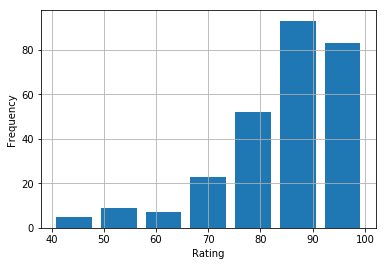

In [30]:
###histogram for Rating bin size = 7
whiskeydf.Rating.hist(bins=7, rwidth=0.8);
plt.xlabel('Rating');
plt.ylabel('Frequency');

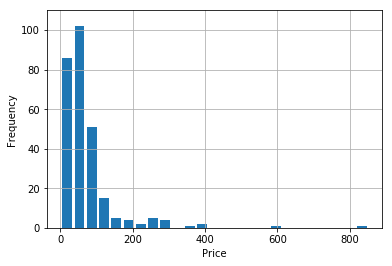

In [31]:
###histogram for Rating bin size = 25
whiskeydf.Price.hist(bins=25, rwidth=0.8);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.ylim([0,110]);

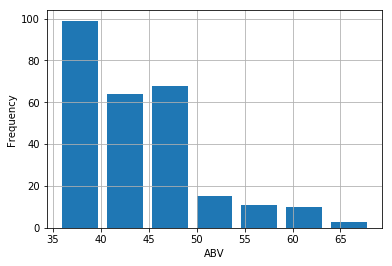

In [32]:
###histogram for ABV bin size = 7
whiskeydf.ABV.hist(bins=7, rwidth=0.8);
plt.xlabel('ABV');
plt.ylabel('Frequency');

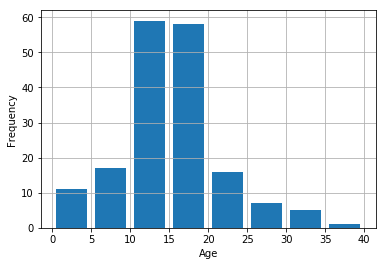

In [33]:
###histogram for Age bin size = 8
whiskeydf.Age.hist(bins=8, rwidth=0.8);
plt.xlabel('Age');
plt.ylabel('Frequency');

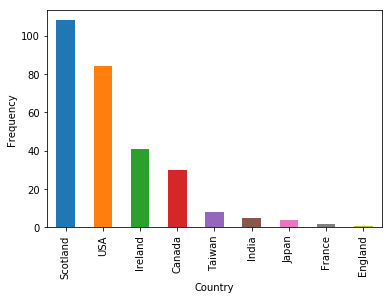

In [34]:
###histogram for Country 
whiskeydf['Country'].value_counts().plot.bar();
plt.xlabel('Country');
plt.ylabel('Frequency');

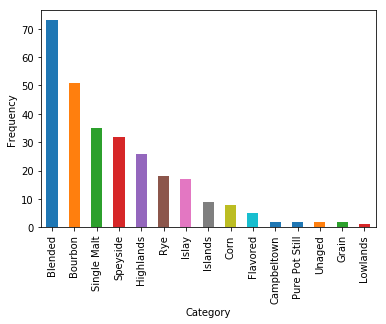

In [35]:
###histogram for Category
whiskeydf['Category'].value_counts().plot.bar();
plt.xlabel('Category');
plt.ylabel('Frequency');

In [36]:
# Box plot Rating
trace1 = {
  "y": ["64.0", "64.0", "65.0", "65.0", "67.0", "67.0", "67.0", "67.0", "68.0", "68.0", "69.0", "69.0", "69.0", "70.0", "70.0", "71.0", "71.0", "73.0", "73.0", "74.0", "74.0", "74.0", "74.0", "75.0", "76.0", "76.0", "76.0", "76.0", "77.0", "77.0", "77.0", "77.0", "78.0", "78.0", "78.0", "79.0", "79.0", "79.0", "79.0", "80.0", "80.0", "80.0", "80.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "82.0", "82.0", "82.0", "82.0", "82.0", "82.0", "83.0", "83.0", "83.0", "83.0", "83.0", "83.0", "83.0", "84.0", "84.0", "84.0", "84.0", "85.0", "85.0", "85.0", "85.0", "85.0", "85.0", "85.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "87.0", "87.0", "87.0", "87.0", "87.0", "87.0", "87.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "89.0", "89.0", "89.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "91.0", "91.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "93.0", "93.0", "93.0", "94.0", "94.0", "94.0", "94.0", "94.0", "94.0", "94.0", "94.0", "95.0", "95.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "100.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0"], 
  "boxpoints": False, 
  "name": "Rating", 
  "orientation": "v", 
  "type": "box", 
  "ysrc": "pongngai:12:de8bc1"
}
data = go.Data([trace1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": False, 
    "range": [-0.427950310559, 0.572049689441], 
    "showspikes": False, 
    "title": "", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": False, 
    "range": [62, 102], 
    "showspikes": False, 
    "title": "Score", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Rating_boxplot', sharing='public')

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [37]:
trace2 = {
  "y": ["30.0", "20.0", "24.0", "25.0", "50.0", "60.0", "65.0", "14.0", "25.0", "12.0", "23.0", "23.0", "20.0", "45.0", "26.0", "27.0", "50.0", "84.0", "90.0", "90.0", "40.0", "50.0", "58.0", "85.0", "36.0", "70.0", "16.0", "45.0", "50.0", "28.0", "70.0", "20.0", "75.0", "17.0", "73.0", "32.0", "41.0", "26.0", "27.0", "16.0", "63.0", "25.0", "36.0", "20.0", "43.0", "58.0", "20.0", "35.0", "25.0", "40.0", "60.0", "55.0", "69.0", "25.0", "17.0", "50.0", "28.0", "50.0", "70.0", "100.0", "19.0", "17.0", "100.0", "28.0", "33.0", "42.0", "70.0", "35.0", "65.0", "60.0", "25.0", "47.0", "100.0", "43.0", "34.0", "68.0", "98.0", "65.0", "39.0", "95.0", "36.0", "61.0", "24.0", "50.0", "43.0", "43.0", "20.0", "24.0", "40.0", "49.0", "20.0", "50.0", "60.0", "50.0", "49.0", "53.0", "40.0", "32.0", "60.0", "100.0", "35.0", "48.0", "40.0", "45.0", "25.0", "48.0", "40.0", "61.0", "75.0", "21.0", "53.0", "128.0", "27.0", "34.0", "50.0", "125.0", "65.0", "35.0", "90.0", "140.0", "79.0", "70.0", "45.0", "37.0", "70.0", "55.0", "90.0", "29.0", "64.0", "75.0", "67.0", "94.0", "70.0", "40.0", "47.0", "45.0", "57.0", "109.0", "47.0", "39.0", "35.0", "32.0", "108.0", "107.0", "60.0", "115.0", "68.0", "80.0", "45.0", "42.0", "47.0", "55.0", "70.0", "50.0", "80.0", "84.0", "30.0", "43.0", "89.0", "62.0", "73.0", "30.0", "79.0", "43.0", "54.0", "48.0", "25.0", "30.0", "40.0", "65.0", "64.0", "40.0", "35.0", "120.0", "42.0", "80.0", "92.0", "107.0", "45.0", "100.0", "60.0", "70.0", "50.0", "45.0", "45.0", "70.0", "11.0", "58.0", "80.0", "72.0", "92.0", "8.0", "50.0", "50.0", "30.0", "40.0"], 
  "boxpoints": False, 
  "line": {"color": "rgb(180, 104, 31)"}, 
  "name": "Price", 
  "type": "box", 
  "ysrc": "pongngai:14:c7bca7"
}
data = go.Data([trace2])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 0.5], 
    "title": "", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0.666666666667, 147.333333333], 
    "title": "US dollar", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Price_boxplot', sharing='public')

In [38]:
trace3 = {
  "y": ["40.0", "40.0", "40.0", "40.0", "43.0", "40.0", "40.0", "40.0", "40.0", "40.0", "40.0", "40.0", "40.0", "43.0", "40.0", "40.0", "43.0", "40.0", "40.0", "46.0", "40.0", "45.0", "40.0", "43.0", "46.0", "46.0", "40.0", "40.0", "43.0", "40.0", "46.0", "50.0", "45.0", "40.0", "40.0", "40.0", "46.0", "43.0", "40.0", "43.0", "43.0", "43.0", "40.0", "40.0", "46.0", "43.0", "40.0", "42.5", "40.0", "40.0", "42.0", "41.0", "40.0", "40.0", "41.0", "40.0", "40.0", "40.0", "40.0", "43.0", "50.0", "40.0", "43.0", "46.0", "43.0", "46.0", "45.0", "47.0", "43.0", "43.0", "40.0", "40.0", "40.0", "40.0", "46.0", "43.0", "54.7", "50.0", "40.0", "46.0", "40.0", "40.0", "40.0", "40.0", "43.0", "43.0", "43.0", "45.0", "40.0", "47.8", "45.0", "40.0", "43.0", "43.0", "47.0", "50.0", "45.0", "40.0", "40.0", "43.0", "40.0", "43.0", "40.0", "46.0", "42.0", "40.0", "40.0", "46.0", "47.0", "50.0", "43.0", "43.0", "45.0", "45.0", "47.0", "50.0", "43.0", "40.0", "47.0", "40.0", "43.0", "43.0", "43.0", "54.1", "43.0", "40.0", "47.0", "43.0", "40.0", "46.0", "46.0", "46.0", "40.0", "40.0", "46.3", "40.0", "45.0", "43.0", "48.0", "40.0", "45.0", "45.0", "46.3", "43.0", "46.0", "46.0", "45.82", "43.0", "43.0", "50.5", "40.0", "46.0", "45.0", "50.05", "46.2", "46.0", "47.5", "40.0", "43.0", "46.0", "43.0", "40.0", "43.0", "46.3", "40.0", "43.0", "40.0", "40.0", "40.0", "48.0", "40.0", "46.0", "40.0", "43.0", "40.0", "46.0", "46.3", "48.0", "40.0", "43.0", "43.0", "43.0", "40.0", "40.0", "48.0", "43.0", "40.0", "53.5", "54.2", "46.0", "43.0", "43.0", "43.0", "43.0", "46.0", "45.0"], 
  "boxpoints": False, 
  "line": {"color": "rgb(180, 31, 70)"}, 
  "name": "ABV", 
  "orientation": "v", 
  "type": "box", 
  "ysrc": "pongngai:16:9fe409"
}
data = go.Data([trace3])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 0.5], 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [39.1833333333, 55.5166666667], 
    "title": "Volume", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='ABV_boxplot',sharing='public')

In [39]:
trace4 = {
  "y": ["14.5", "14.5", "14.5", "14.5", "15.0", "14.5", "18.0", "8.0", "14.5", "14.5", "14.5", "12.0", "14.5", "12.0", "14.5", "8.0", "8.0", "18.0", "12.0", "14.5", "10.0", "14.5", "19.0", "10.0", "14.5", "14.5", "14.5", "15.0", "15.0", "12.0", "14.5", "8.0", "18.0", "14.5", "18.0", "11.0", "14.5", "12.0", "14.5", "14.5", "16.0", "12.0", "8.0", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "10.0", "14.5", "8.0", "10.0", "14.5", "14.5", "14.5", "18.0", "14.5", "14.5", "19.0", "14.5", "14.5", "14.5", "14.5", "14.5", "14.0", "10.0", "12.0", "10.0", "15.0", "12.0", "14.5", "16.0", "18.0", "14.5", "10.0", "15.0", "14.5", "14.5", "14.5", "10.0", "12.0", "12.0", "8.0", "14.5", "12.0", "15.0", "14.5", "12.0", "10.0", "10.0", "14.5", "10.0", "14.5", "14.5", "14.5", "15.0", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "12.0", "14.5", "14.5", "14.5", "12.0", "17.0", "14.5", "14.5", "12.0", "15.0", "16.0", "12.0", "18.0", "14.5", "18.0", "15.0", "12.0", "14.5", "18.0", "15.0", "17.0", "10.0", "16.0", "14.5", "15.0", "17.0", "14.5", "12.0", "12.0", "15.0", "17.0", "17.0", "14.5", "10.0", "10.0", "14.5", "15.0", "18.0", "16.0", "16.0", "12.0", "18.0", "12.0", "14.5", "10.0", "12.0", "14.5", "12.0", "14.5", "14.5", "14.5", "12.0", "15.0", "18.0", "17.0", "12.0", "18.0", "12.0", "14.5", "15.0", "14.5", "12.0", "12.0", "16.0", "18.0", "14.5", "12.0", "18.0", "10.0", "10.0", "18.0", "18.0", "12.0", "18.0", "14.0", "14.5", "17.0", "12.0", "14.5", "15.0", "14.5", "15.0", "14.5", "10.0", "12.0", "14.5", "14.5", "10.0", "12.0", "18.0"], 
  "boxpoints": False, 
  "line": {"color": "rgb(31, 180, 65)"}, 
  "name": "Age", 
  "type": "box", 
  "ysrc": "pongngai:18:1e5aff"
}
data = go.Data([trace4])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 0.5], 
    "title": "Click to enter X axis title", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [7.38888888889, 19.6111111111], 
    "title": "Year", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Age_boxplot',sharing='public')

In [21]:
wk = wk.drop('Age', axis=1)

In [22]:
wk = wk.drop('Brand', axis=1)

In [23]:
wk = wk.drop('Name', axis=1)

In [24]:
wk = wk.dropna()

In [25]:
wk.describe()

,Rating,Price,ABV
count,260.000000,260.000000,260.000000
mean,85.350000,73.388462,44.528154
std,10.828097,84.056787,5.864605
min,40.000000,9.000000,35.500000
25%,81.000000,33.500000,40.000000
50%,88.000000,50.000000,43.000000
75%,94.000000,80.000000,46.000000
max,100.000000,850.000000,68.200000


In [27]:
wk.head()

,Rating,Country,Category,Price,ABV
0,40.0,Canada,Blended,9.0,40.0
2,47.0,Ireland,Blended,20.0,40.0
4,48.0,Canada,Blended,12.0,40.0
6,53.0,Canada,Blended,12.0,40.0
8,54.0,USA,Blended,20.0,40.0


In [111]:
en = LabelEncoder()

In [112]:
x = wk.values

In [113]:
x[:,1] = en.fit_transform(x[:,1])
x[:,2] = en.fit_transform(x[:,2])

In [114]:
x.shape

(260, 5)

In [115]:
y = x[:,0]
x = x[:,1:]
print(x.shape, y.shape)

(260, 4) (260,)


In [116]:
y = MinMaxScaler().fit_transform(y.reshape(-1, 1))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype object was converted to float64 by MinMaxScaler.



In [117]:
x = MinMaxScaler().fit_transform(x)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning:

Data with input dtype object was converted to float64 by MinMaxScaler.



In [118]:
print(x.min(axis=0), x.max(axis=0))
print(y.min(), y.max())

[0. 0. 0. 0.] [1. 1. 1. 1.]
0.0 1.0


In [119]:
y = np.array(['low' if i <= 0.33 else "medium" if i <= 0.66 else "high" for i in y])

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.2, shuffle=True)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(208, 4) (208,)
(52, 4) (52,)


In [121]:
clf = tree.DecisionTreeClassifier()

In [122]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
count = 0
for i in range(x_test.shape[0]):
    if clf.predict(x_test[i].reshape(1, -1)) == y_test[i]:
        count += 1
    else:
        
print("accuracy:", count/x_test.shape[0]*100)

['high'] medium
['medium'] high
['medium'] high
['high'] medium
['high'] low
['medium'] high
['low'] medium
['high'] medium
['high'] medium
['medium'] high
['medium'] high
['high'] medium
['low'] medium
accuracy: 75.0
